In [3]:
%%capture 
!pip install h2o

In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 07_1_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_1_LEARN_DataAnalysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

We can import the data repositoru like this: 

In [2]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 0. Intro
In this study, we aim to use machine learning techniques to predict the best promoter-gene combinations. Machine learning is a powerful tool that allows us to analyze large and complex datasets, identify patterns and make predictions. We will use various machine learning algorithms through the package H2O. 

The machine learning models will be trained on the data from the experiments from[06_1_TEST_LibraryCharacterisation](../colab_notebooks/06_1_TEST_LibraryCharacterisation.ipynb), and will learn to predict the best promoter-gene combination based on the observed phenotype and genotype. This will enable us to identify the combination of genes and promoters that result in the highest level of expression or activity, without the need for additional experimentation.

Ultimately, the use of machine learning to predict the best promoter-gene combination will greatly improve the efficiency and allowing us to identify the best combination in a shorter time and with fewer resources.



In this notebook we continue the workflow by using Machine Learning to predict the best promoter:gene combinations of the remaining library that was generated in [05_1_BUILD_CombinatorialLibrary_AllStrain](../colab_notebooks/05_1_BUILD_CombinatorialLibrary_AllStrains.ipynb) and analyzed in [06_1_TEST_LibraryCharacterisation](../colab_notebooks/06_1_TEST_LibraryCharacterisation.ipynb). 

## Project overview - Use ML to predicte best promoter:gene combinations 

**Hypothesis**
1. Specific combinations of CPR / G8H homologs and corresponding expression levels can remove the G8H bottleneck in the Strictosidine pathway

Aim: To test the hypothesis

Tasks
1. dgRNA
2. Base strain
3. Library
4. Phenotyping
**5. Machine Learning**
   - Predict the best promoter:gene combinations


## 1. Setting up the AutoML library

In [4]:
import h2o
from h2o.automl import H2OAutoML

In [5]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321 ... connected.


H2O_cluster_uptime:,2 days 1 hour 23 mins
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,6 months and 3 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_ynlrw8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,458.8 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [6]:
#h2o.shutdown()

### 1.1 Import out dataframe to h20 object

Train a model based on the target and the df

In [7]:
# Run ML with new input 
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/data/09-AutoML/input_to_ml/first_round/input_for_ml_1st_iteration_all_analytics.csv')
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.922793
1,yp49_C01,1,2,5,9,0.509123
2,yp49_D01,2,4,7,3,0.166871
3,yp49_E01,2,1,5,7,0.327489
4,yp49_F01,3,3,6,1,25.060934
...,...,...,...,...,...,...
162,yp51_C12,8,3,7,2,0.000000
163,yp51_D12,8,2,7,6,0.591185
164,yp51_E12,8,1,6,10,0.448644
165,yp50_F05,6,1,8,2,13.391244


In [8]:
new_input_for_ml['default_rank'] = new_input_for_ml['Amt_norm'].rank()
new_input_for_ml['max_rank'] = new_input_for_ml['Amt_norm'].rank(method='max')
new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)
new_input_for_ml = new_input_for_ml.sort_values(by= 'max_rank', ascending = False)

In [9]:
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm,default_rank,max_rank,NA_bottom,pct_rank
73,yp50_D03,5,2,6,3,245.034275,167.0,167.0,167.0,1.000000
75,yp50_G03,6,2,6,5,156.327285,166.0,166.0,166.0,0.994012
86,yp50_E05,5,1,6,8,144.340857,165.0,165.0,165.0,0.988024
126,yp51_A02,7,2,6,1,135.693498,164.0,164.0,164.0,0.982036
106,yp50_A09,4,2,6,3,134.321746,163.0,163.0,163.0,0.976048
...,...,...,...,...,...,...,...,...,...,...
60,yp50_E01,5,3,5,7,0.000000,30.0,59.0,30.0,0.179641
114,yp50_D11,5,4,8,6,0.000000,30.0,59.0,30.0,0.179641
24,yp49_E05,2,3,7,8,0.000000,30.0,59.0,30.0,0.179641
27,yp49_H05,3,3,7,10,0.000000,30.0,59.0,30.0,0.179641


In [10]:
# Choosing which coloums to train on 
new_input_for_ml = new_input_for_ml[['Line_name','0','1','2','3','Amt_norm']]
new_input_for_ml.columns = ['Line_name','0','1','2','3','Amt_norm']

In [11]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:167
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.580838323353294,2.682634730538923,6.562874251497007,5.305389221556885,15.546391286319041
maxs,NaN,8.0,4.0,8.0,10.0,245.03427469317091
sigma,NaN,2.253055064641254,1.1621014428030096,1.1696200092422187,2.836323292129,36.58610063884372
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp50_D03,5.0,2.0,6.0,3.0,245.03427469317091
1,yp50_G03,6.0,2.0,6.0,5.0,156.3272849244192
2,yp50_E05,5.0,1.0,6.0,8.0,144.34085698560642


In [12]:
# Since the data is categorical we need to make it from numerical to categorical 
df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()

In [13]:
df_test.describe()

Rows:167
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,15.546391286319041
maxs,NaN,,,,,245.03427469317091
sigma,NaN,,,,,36.58610063884372
zeros,0,,,,,59
missing,0,0,0,0,0,0
0,yp50_D03,5,2,6,3,245.03427469317091
1,yp50_G03,6,2,6,5,156.3272849244192
2,yp50_E05,5,1,6,8,144.34085698560642


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2. RUN automl

Here we are defining the autoML object and after we can train it

In [ ]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=10,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
#    exclude_algos = ["StackedEnsemble"],
    sort_metric = "MAE",
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [ ]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 ) 

AutoML progress: |█
13:24:37.831: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.

██████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 51.1 s, sys: 5.05 s, total: 56.2 s
Wall time: 1h 1s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_8_20221215_132434_model_22


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,601 weights/biases, 22.4 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15.0,,,,,,,,,
1,,2,50,RectifierDropout,30.0,0.0,0.0,0.155423,0.351785,0.0,-0.318059,0.852019,0.442928,1.227627
2,,3,1,Linear,,0.0,0.0,0.000949,0.000735,0.0,-0.102599,0.738409,-0.394456,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 45.930853000850924
RMSE: 6.777230481609056
MAE: 3.335469464610631
RMSLE: 0.607560508866344
Mean Residual Deviance: 45.930853000850924

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 519.4250352979468
RMSE: 22.790898080109674
MAE: 9.48473623441736
RMSLE: NaN
Mean Residual Deviance: 519.4250352979468

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,9.479498,4.383686,14.365232,15.532976,14.356224,8.450772,4.229580,3.628579,6.667943,12.140803,9.221432,6.201436
1,mean_residual_deviance,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
2,mse,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
3,r2,0.665335,0.235466,0.722849,0.426765,0.523778,0.789084,0.928504,0.979567,0.845968,0.597882,0.222816,0.616137
4,residual_deviance,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
5,rmse,20.627329,10.142387,35.161560,33.849266,28.885113,18.042140,9.905219,5.137255,13.661209,20.881552,25.908957,14.841026
6,rmsle,0.850962,0.214088,0.715972,1.219461,NaN,0.865462,0.817273,0.665971,0.626418,1.191425,0.768210,0.788470



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-15 14:18:46,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-15 14:18:46,9 min 34.787 sec,238571 obs/sec,10.0,1,1670.0,66.424261,4412.182506,63.655839,-1.682174
2,,2022-12-15 14:18:48,9 min 37.049 sec,737067 obs/sec,10010.0,1001,1671670.0,6.777230,45.930853,3.335469,0.972079



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.4,1.000000,1.000000,0.071935
1,2.7,0.962853,0.962853,0.069263
2,1.3,0.880319,0.880319,0.063326
3,0.1,0.850323,0.850323,0.061168
4,3.10,0.700540,0.700540,0.050393
5,2.8,0.612269,0.612269,0.044044
6,0.8,0.607257,0.607257,0.043683
7,3.6,0.598460,0.598460,0.043050
8,0.2,0.534740,0.534740,0.038467
9,3.5,0.531631,0.531631,0.038243



See the whole table with table.as_data_frame()


In [ ]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [ ]:
# saving the models
leaderboard = AutoML.leaderboard
lb= leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])

out_path = 'ConStrain_on_google_colab/data/09-AutoML/leaderboards/first_round/'
for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)

In [ ]:
len(model_ids)

506

Now we want to extract the best models

In [ ]:
df_from_h2o_object = lb.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,DeepLearning_grid_1_AutoML_8_20221215_132434_model_22,9.484736,22.790898,519.425035,NaN,519.425035
1,DeepLearning_grid_1_AutoML_8_20221215_132434_model_38,9.905577,23.079883,532.680991,NaN,532.680991
2,DeepLearning_grid_1_AutoML_8_20221215_132434_model_13,10.123991,21.871767,478.374186,NaN,478.374186
3,XGBoost_grid_1_AutoML_8_20221215_132434_model_165,10.249442,23.281310,542.019405,NaN,542.019405
4,DeepLearning_grid_1_AutoML_8_20221215_132434_model_37,10.398796,22.792866,519.514725,NaN,519.514725
...,...,...,...,...,...,...
501,XRT_1_AutoML_8_20221215_132434,20.438842,36.302526,1317.873382,1.921897,1317.873382
502,GBM_grid_1_AutoML_8_20221215_132434_model_38,20.493587,33.548142,1125.477802,NaN,1125.477802
503,GBM_grid_1_AutoML_8_20221215_132434_model_155,20.578879,34.037974,1158.583694,NaN,1158.583694
504,DeepLearning_1_AutoML_8_20221215_132434,23.707335,34.644571,1200.246333,NaN,1200.246333


### 3.1 Saving the best model

In [ ]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_8_20221215_132434_model_22


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,601 weights/biases, 22.4 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15.0,,,,,,,,,
1,,2,50,RectifierDropout,30.0,0.0,0.0,0.155423,0.351785,0.0,-0.318059,0.852019,0.442928,1.227627
2,,3,1,Linear,,0.0,0.0,0.000949,0.000735,0.0,-0.102599,0.738409,-0.394456,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 45.930853000850924
RMSE: 6.777230481609056
MAE: 3.335469464610631
RMSLE: 0.607560508866344
Mean Residual Deviance: 45.930853000850924

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 519.4250352979468
RMSE: 22.790898080109674
MAE: 9.48473623441736
RMSLE: NaN
Mean Residual Deviance: 519.4250352979468

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,9.479498,4.383686,14.365232,15.532976,14.356224,8.450772,4.229580,3.628579,6.667943,12.140803,9.221432,6.201436
1,mean_residual_deviance,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
2,mse,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
3,r2,0.665335,0.235466,0.722849,0.426765,0.523778,0.789084,0.928504,0.979567,0.845968,0.597882,0.222816,0.616137
4,residual_deviance,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
5,rmse,20.627329,10.142387,35.161560,33.849266,28.885113,18.042140,9.905219,5.137255,13.661209,20.881552,25.908957,14.841026
6,rmsle,0.850962,0.214088,0.715972,1.219461,NaN,0.865462,0.817273,0.665971,0.626418,1.191425,0.768210,0.788470



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-15 14:18:46,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-15 14:18:46,9 min 34.787 sec,238571 obs/sec,10.0,1,1670.0,66.424261,4412.182506,63.655839,-1.682174
2,,2022-12-15 14:18:48,9 min 37.049 sec,737067 obs/sec,10010.0,1001,1671670.0,6.777230,45.930853,3.335469,0.972079



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.4,1.000000,1.000000,0.071935
1,2.7,0.962853,0.962853,0.069263
2,1.3,0.880319,0.880319,0.063326
3,0.1,0.850323,0.850323,0.061168
4,3.10,0.700540,0.700540,0.050393
5,2.8,0.612269,0.612269,0.044044
6,0.8,0.607257,0.607257,0.043683
7,3.6,0.598460,0.598460,0.043050
8,0.2,0.534740,0.534740,0.038467
9,3.5,0.531631,0.531631,0.038243



See the whole table with table.as_data_frame()


In [ ]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/data/09-AutoML/best_models/first_round/", force=True)

### 3.2 Exporting the leaderboard

In [ ]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [ ]:
models_path = "ConStrain_on_google_colab/data/09-AutoML/leaderboards/first_round/"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_8_20221215_132434_model_22,9.48474,22.7909,519.425,nan,519.425
DeepLearning_grid_1_AutoML_8_20221215_132434_model_38,9.90558,23.0799,532.681,nan,532.681
DeepLearning_grid_1_AutoML_8_20221215_132434_model_13,10.124,21.8718,478.374,nan,478.374
XGBoost_grid_1_AutoML_8_20221215_132434_model_165,10.2494,23.2813,542.019,nan,542.019
DeepLearning_grid_1_AutoML_8_20221215_132434_model_37,10.3988,22.7929,519.515,nan,519.515
DeepLearning_grid_1_AutoML_8_20221215_132434_model_17,10.4231,22.4236,502.816,nan,502.816
XGBoost_grid_1_AutoML_8_20221215_132434_model_292,10.5124,23.5539,554.785,nan,554.785
DeepLearning_grid_1_AutoML_8_20221215_132434_model_19,10.5338,23.5018,552.336,nan,552.336
DeepLearning_grid_1_AutoML_8_20221215_132434_model_35,10.5776,24.5099,600.737,nan,600.737
XGBoost_grid_1_AutoML_8_20221215_132434_model_131,10.9126,24.0953,580.583,nan,580.583


## 4. Importing the best model

In [ ]:
best_model = h2o.load_model("ConStrain_on_google_colab/data/09-AutoML/best_models/first_round/"+lb[0,0]) 
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/data/09-AutoML/best_models/first_round/")
uploaded_model = h2o.upload_model(my_local_model)

In [ ]:
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_8_20221215_132434_model_22


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,601 weights/biases, 22.4 KB, 1,671,670 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15.0,,,,,,,,,
1,,2,50,RectifierDropout,30.0,0.0,0.0,0.155423,0.351785,0.0,-0.318059,0.852019,0.442928,1.227627
2,,3,1,Linear,,0.0,0.0,0.000949,0.000735,0.0,-0.102599,0.738409,-0.394456,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 45.930853000850924
RMSE: 6.777230481609056
MAE: 3.335469464610631
RMSLE: 0.607560508866344
Mean Residual Deviance: 45.930853000850924

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 519.4250352979468
RMSE: 22.790898080109674
MAE: 9.48473623441736
RMSLE: NaN
Mean Residual Deviance: 519.4250352979468

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,9.479498,4.383686,14.365232,15.532976,14.356224,8.450772,4.229580,3.628579,6.667943,12.140803,9.221432,6.201436
1,mean_residual_deviance,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
2,mse,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
3,r2,0.665335,0.235466,0.722849,0.426765,0.523778,0.789084,0.928504,0.979567,0.845968,0.597882,0.222816,0.616137
4,residual_deviance,518.067930,433.830900,1236.335400,1145.772800,834.349700,325.518800,98.113360,26.391392,186.628630,436.039180,671.274050,220.256060
5,rmse,20.627329,10.142387,35.161560,33.849266,28.885113,18.042140,9.905219,5.137255,13.661209,20.881552,25.908957,14.841026
6,rmsle,0.850962,0.214088,0.715972,1.219461,NaN,0.865462,0.817273,0.665971,0.626418,1.191425,0.768210,0.788470



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-15 14:18:46,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-15 14:18:46,9 min 34.787 sec,238571 obs/sec,10.0,1,1670.0,66.424261,4412.182506,63.655839,-1.682174
2,,2022-12-15 14:18:48,9 min 37.049 sec,737067 obs/sec,10010.0,1001,1671670.0,6.777230,45.930853,3.335469,0.972079



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.4,1.000000,1.000000,0.071935
1,2.7,0.962853,0.962853,0.069263
2,1.3,0.880319,0.880319,0.063326
3,0.1,0.850323,0.850323,0.061168
4,3.10,0.700540,0.700540,0.050393
5,2.8,0.612269,0.612269,0.044044
6,0.8,0.607257,0.607257,0.043683
7,3.6,0.598460,0.598460,0.043050
8,0.2,0.534740,0.534740,0.038467
9,3.5,0.531631,0.531631,0.038243



See the whole table with table.as_data_frame()


### 4.1 Investigate the best model - Cross-validation holdout predictions

Get the cross validation predictions

In [ ]:
cross_validation_holdout_predictions = best_model.predict(df_test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [ ]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()

In [ ]:
cross_validation_holdout_predictions.frame_id

'cv_holdout_prediction_DeepLearning_grid_1_AutoML_8_20221215_132434_model_22'

In [ ]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram

,predict
0,141.858058
1,56.197185
2,85.943359
3,130.045154
4,136.690333
...,...
162,0.606824
163,0.234127
164,2.162226
165,0.798118


In [ ]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

10


In [ ]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [ ]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True).sort_values(by= 'Amt_norm', ascending = False).reset_index()
df3.head(10)

,index,Line_name,0,1,2,3,Amt_norm,predict
0,0,yp50_D03,5,2,6,3,277.307816,141.858058
1,1,yp50_G03,6,2,6,5,176.917201,56.197185
2,2,yp50_E05,5,1,6,8,163.352037,85.943359
3,3,yp50_A09,4,2,6,3,152.013305,130.045154
4,4,yp51_A02,7,2,6,1,141.151036,136.690333
5,5,yp50_D07,5,2,5,5,140.230004,129.314144
6,6,yp49_F04,3,2,6,2,138.940568,91.170934
7,7,yp51_A01,7,2,5,1,127.125752,72.160940
8,8,yp50_F10,6,2,5,4,113.702822,12.529595
9,9,yp50_D05,5,2,8,4,93.912536,38.308369


#### Barplot of production vs prediction 

In [ ]:
from constrain.plotting.plotting import bar_plot_w_hue

In [ ]:
%%capture
# initialize
ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']
ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']

# add category
ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

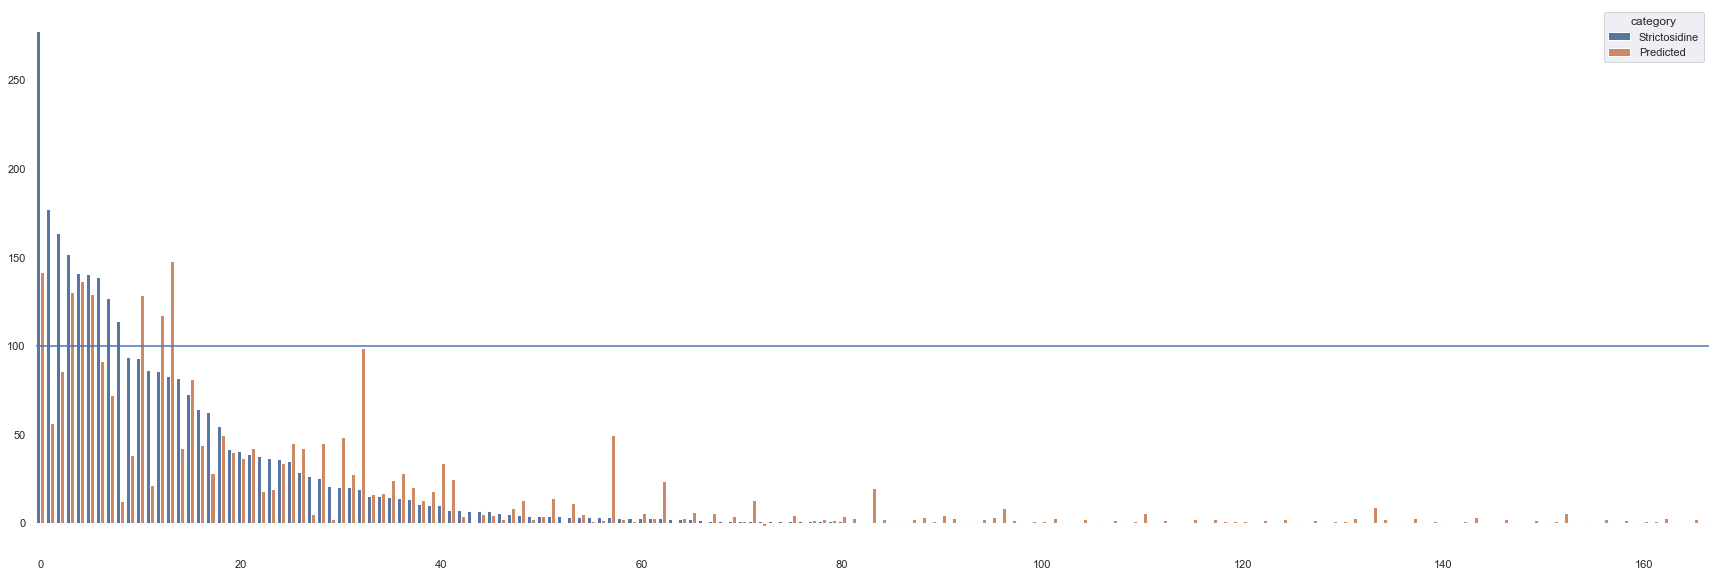

In [ ]:
bar_plot_w_hue(dss, 'Line_name', 'strict', path = 'ConStrain_on_google_colab/data/10-plots/07_1_LEARN_DataAnalysis/Prediction of the sampled library_ranked')

#### Ranking production and correlation plots 

In [ ]:
df3['norm_strict_measured_rank_pct']= df3['Amt_norm'].rank(pct=True)
df3['Predicted_strict_production_rank_pct'] = df3['predict'].rank(pct=True)
df3.to_csv('ConStrain_on_google_colab/data/09-AutoML/all_predictions/first_round/input_for_ml_1st_iteration_w_predictions_and_ranking.csv')
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,default_rank,default_rank_predicted,norm_strict_measured_rank_pct,Predicted_strict_production_rank_pct
0,0,yp50_D03,5,2,6,3,277.307816,141.858058,167.0,166.0,1.000000,0.994012
1,1,yp50_G03,6,2,6,5,176.917201,56.197185,166.0,155.0,0.994012,0.928144
2,2,yp50_E05,5,1,6,8,163.352037,85.943359,165.0,158.0,0.988024,0.946108
3,3,yp50_A09,4,2,6,3,152.013305,130.045154,164.0,164.0,0.982036,0.982036
4,4,yp51_A02,7,2,6,1,141.151036,136.690333,163.0,165.0,0.976048,0.988024
...,...,...,...,...,...,...,...,...,...,...,...,...
162,131,yp50_F12,6,4,7,4,0.000000,2.564601,30.0,94.5,0.179641,0.565868
163,132,yp51_E02,8,1,8,7,0.000000,0.606824,30.0,28.0,0.179641,0.167665
164,133,yp50_G06,6,4,6,6,0.000000,0.234127,30.0,9.0,0.179641,0.053892
165,134,yp50_E03,5,4,7,7,0.000000,2.162226,30.0,83.0,0.179641,0.497006


In [ ]:
from constrain.plotting.plotting import correlation_plot

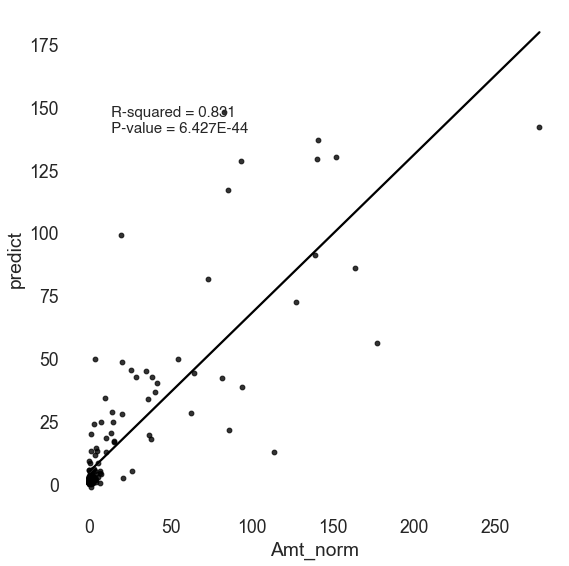

In [ ]:
correlation_plot(df3,"Amt_norm","predict", save_pdf = True , path ='ConStrain_on_google_colab/data/10-plots/07_1_LEARN_DataAnalysis/corr_plot_Amt_predict')

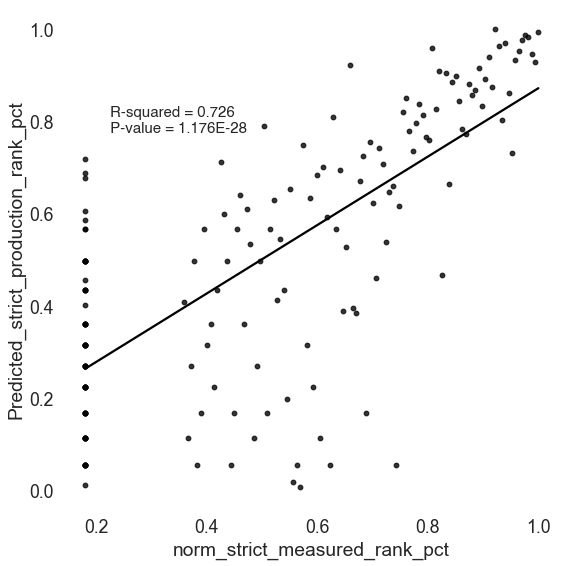

In [ ]:
correlation_plot(df3,"norm_strict_measured_rank_pct","Predicted_strict_production_rank_pct", save_pdf = True , 
                 path ='ConStrain_on_google_colab/data/10-plots/07_1_LEARN_DataAnalysis/corr_plot_rank_rank_predict')

## 5. Clean up data on the remaining library of combinations of genotypes

In [ ]:
import numpy as np

In [ ]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/data/03-strain_sequences/systematic_names_of_all_strains/systematic_names_on_all_combinations.csv')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [ ]:
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
73,5,2,6,3
75,6,2,6,5
86,5,1,6,8
106,4,2,6,3
126,7,2,6,1
...,...,...,...,...
60,5,3,5,7
114,5,4,8,6
24,2,3,7,8
27,3,3,7,10


Getting rid of the genotypes we have already tested:

In [ ]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [ ]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [ ]:
len(predicted)

1121

In [ ]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,1.142488
1,1.142488
2,1.142488
3,1.142488
4,1.142488


## 6. Predict the  phenotypes from the whole library

In [ ]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_3144/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
694,5,2,6,5,194.227427
652,5,1,6,3,169.986071
852,6,2,6,3,167.691685
691,5,2,6,2,167.541633
1012,7,2,6,3,159.657869
...,...,...,...,...,...
253,2,3,6,4,-13.766886
254,2,3,6,5,-13.964787
816,6,1,6,7,-14.636814
892,6,3,6,3,-15.929870


If we want the names on the genotypes we can do the following: 

In [ ]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

In [ ]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(10)

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Rse,194.227427
1,Smus,CYC1,TPI1,Ara,169.986071
2,Rsep,ENO2,TPI1,Ara,167.691685
3,Smus,ENO2,TPI1,Aan,167.541633
4,Oeu,ENO2,TPI1,Ara,159.657869
5,Smus,ENO2,CCW12,Ara,157.780673
6,Smus,ENO2,TPI1,Cac,155.862611
7,Smus,ENO2,TPI1,Oeu,147.673656
8,Smus,CYC1,TPI1,Rse,142.047185
9,Rsep,ENO2,CCW12,Rse,141.90171


In [ ]:
from constrain.plotting.plotting import bar_plot

#### 6.1 Plot of predicted strictosidine production across all promoter:homolog combinations

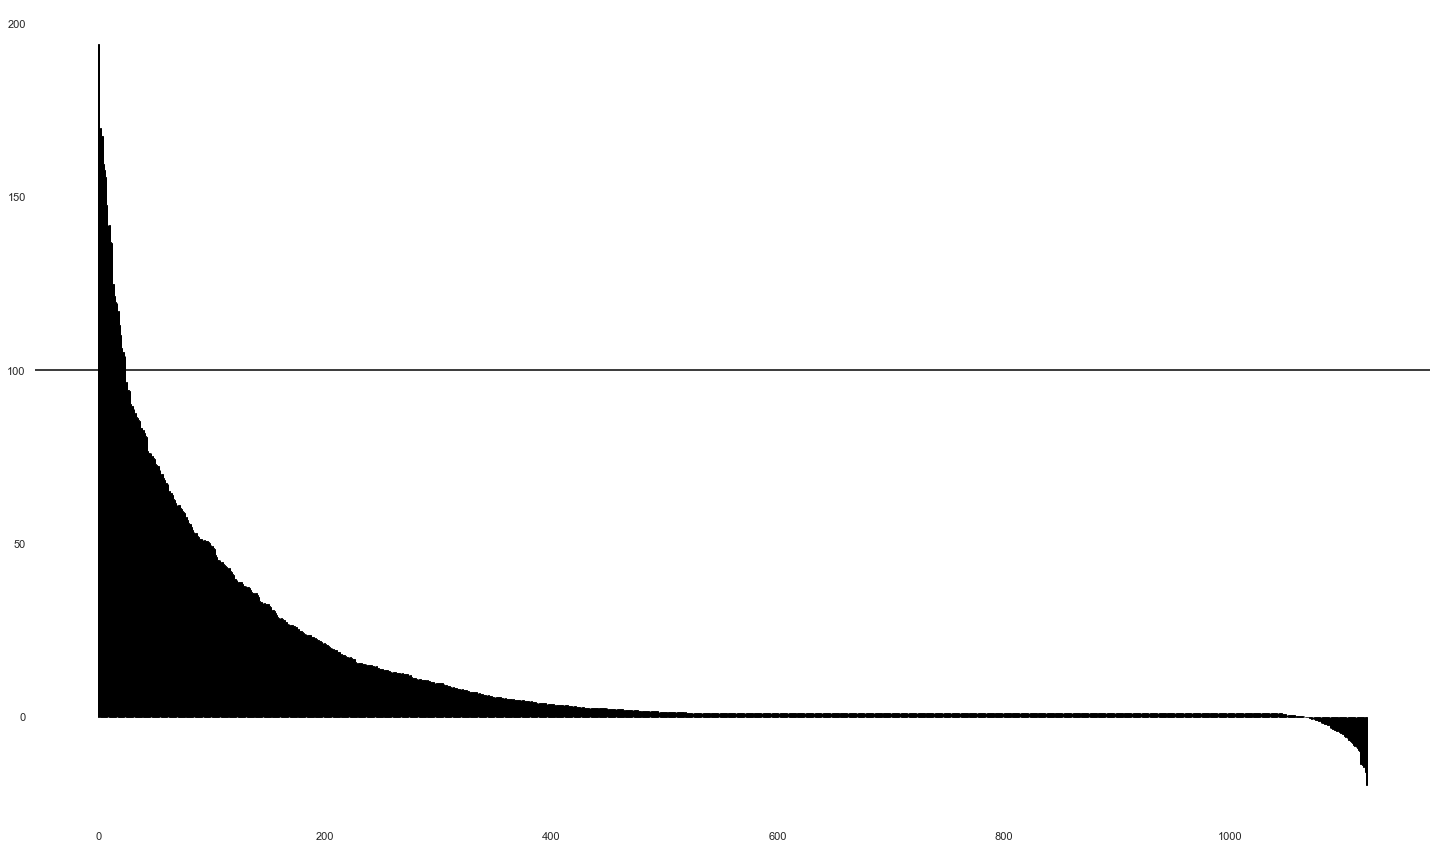

In [ ]:
x = list(df_with_genotypes.index)
y = list(df_with_genotypes['Predicted_strict_production'])

bar_plot(x, y, path = 'ConStrain_on_google_colab/data/10-plots/07_1_LEARN_DataAnalysis/barplot_predicting_remaining_best_combinations')

In [ ]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Rse,194.227427
1,Smus,CYC1,TPI1,Ara,169.986071
2,Rsep,ENO2,TPI1,Ara,167.691685
3,Smus,ENO2,TPI1,Aan,167.541633
4,Oeu,ENO2,TPI1,Ara,159.657869
...,...,...,...,...,...
1116,Opum,PCK1,TPI1,Clo,-13.766886
1117,Opum,PCK1,TPI1,Rse,-13.964787
1118,Rsep,CYC1,TPI1,Ani,-14.636814
1119,Rsep,PCK1,TPI1,Ara,-15.92987


Lets save the dataframes into csv files

In [ ]:
# getting a unique name
from datetime import datetime
now = datetime.now() # current date and time
time = now.strftime("%Y_%m_%d_%H:%M_")

name = 'top_ML_predicted_after_first_DBTL_merged_analytics'
path = 'ConStrain_on_google_colab/data/09-AutoML/all_predictions/first_round/'

df_with_genotypes.to_csv(path+time+name+'.csv', index=False)

## 7. Top 20 predicted producers of the unseen library

Lets look at the file generated first from one of the first models. 

In [4]:
df_with_genotypes = pd.read_csv('ConStrain_on_google_colab/data/09-AutoML/all_predictions/first_round/top_ML_predicted_after_first_DBTL_merged_analytics.csv')

In [5]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cro,226.138557
1,Smus,ENO2,TPI1,Clo,210.261962
2,Smus,ENO2,TPI1,Cac,205.359575
3,Smus,ENO2,TPI1,Aan,204.539731
4,Rsep,ENO2,TPI1,Cro,193.218189
...,...,...,...,...,...
1116,Rsep,PCK1,CCW12,Rse,-2.813507
1117,Ccal,PCK1,TPI1,Ara,-3.103402
1118,Cro,PCK1,TPI1,Ani,-3.587722
1119,Vmin,PCK1,TPI1,Ani,-3.955426


Adding unique names 

In [6]:
df_with_genotypes['names'] = df_with_genotypes['G8H']+'-' +df_with_genotypes['pG8H']+ '_'+ df_with_genotypes['pCPR']+'_'+df_with_genotypes['CPR']

In [7]:
from constrain.plotting.plotting import horisontal_bar_plot

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


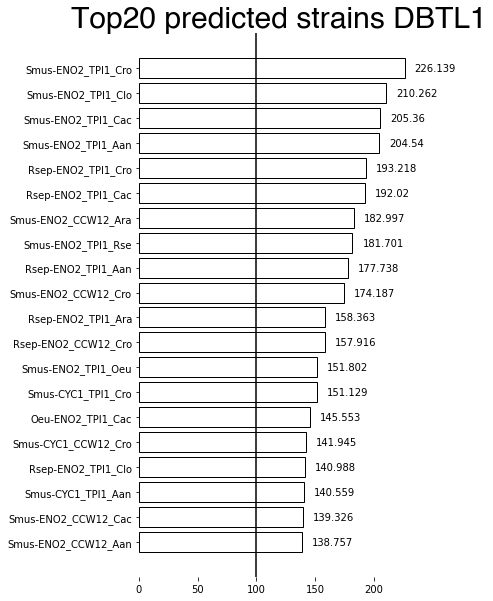

In [12]:
# Plotting top 20 strains
x_axis = list(df_with_genotypes['names'])[:20][::-1]
y_axis = list(df_with_genotypes['Predicted_strict_production'])[:20][::-1]

horisontal_bar_plot(x_axis,y_axis, path = 'ConStrain_on_google_colab/data/10-plots/07_1_LEARN_DataAnalysis/Top20 predicted strains DBTL1', 
                    title = 'Top20 predicted strains DBTL1', 
                   size_height=5, 
                   size_length=10)

### 7.1 How many genotypes are predicted to produce more than the control strain?

In [ ]:
over_100_strict_procduction = df_with_genotypes[df_with_genotypes['Predicted_strict_production'] >= 100 ]
print(f"{len(over_100_strict_procduction)} strains out of {len(df_with_genotypes)} showed production of strictosidine over the normalized value")
print(f"Out of the remaing theoretical space these constittue : {(len(over_100_strict_procduction)/len(df_with_genotypes))*100}")

42 strains out of 1121 showed production of strictosidine over the normalized value
Out of the remaing theoretical space these constittue : 3.746654772524532


## 8. Learning curve on partitioned data

In [14]:
from constrain.machine_learning.auto_ml import autoML_on_partitioned_data

In [15]:
shuffled_new_input_for_ml = new_input_for_ml.sample(frac=1, random_state= 2).reset_index(drop=True) # Random state sets a seed on the shuffeling
shuffled_new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_E04,2,1,6,8,6.419203
1,yp49_F12,3,1,8,4,4.511455
2,yp50_B06,4,3,8,6,0.000000
3,yp49_F11,3,4,7,4,1.613903
4,yp50_C04,4,4,5,10,0.000000
...,...,...,...,...,...,...
162,yp50_G06,6,4,6,6,0.000000
163,yp50_G07,6,1,5,7,0.000000
164,yp49_D02,2,4,5,3,0.991606
165,yp50_F06,6,3,8,2,0.000000


Already did this. It takes +20 hours on my laptop.

In [47]:
feature_cols = ['0', '1', '2', '3']
training_column = 'Amt_norm'

# Training 3 partitions 5 times - the function is set to nfold = 10  by default. 
for i in range(0,3): 
    autoML_on_partitioned_data(feature_cols, training_column,
                               new_input_for_ml,
                               training_time=0, 
                               partitions = 3,
                               nfold= 10,
                               path = 'ConStrain_on_google_colab/data/09-AutoML/learning_curve_data/first_round/0sec_experiment/NOT_shuffled_60sec/')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:05:33.475: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 56.0.

█████
15:05:35.927: StackedEnsemble_BestOfFamily_2_AutoML_109_20230105_150533 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each algorithm type)] failed: java.lang.RuntimeException: water.exceptions.H2OIllegalArgumentException: Not enough data to create 10 random cross-validation splits. Either reduce nfolds, specify a larger dataset (or specify another random number seed, if applicable).

██████████████████████████████████████████████████████████| (done) 100%
len of dataframes that are being traine

### 8.1 - visualizing learning curve

In [70]:
import os

# folder path
dir_path = 'ConStrain_on_google_colab/data/09-AutoML/learning_curve_data/first_round/0sec_experiment/shuffled_random2/'

# list file and directories
res = os.listdir(dir_path)
res

['2023_01_06_05:49_ml_models_running_over_partioned_data.csv',
 '.DS_Store',
 '2023_01_13_02:09_ml_models_running_over_partioned_data.csv',
 '2023_01_06_08:46_ml_models_running_over_partioned_data.csv',
 '2023_01_06_02:51_ml_models_running_over_partioned_data.csv',
 '2023_01_12_23:05_ml_models_running_over_partioned_data.csv']

In [72]:
lst_of_pd_dataframes = []
for ml_partitioned in res:
    if ml_partitioned.endswith('.csv'):
        lst_of_pd_dataframes.append(pd.read_csv(dir_path+ml_partitioned))

Lets retrieve the data 

In [73]:
dfs = [df.set_index('Unnamed: 0') for df in lst_of_pd_dataframes]
concated = pd.concat(dfs, axis=1)
concated

,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name,0,CV_mean_MAE,CV_SD_MAE,Model_name
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
56,7.025441,19.155186,11.301745,StackedEnsemble_BestOfFamily_7_AutoML_121_2023...,13.591087,15.611847,11.016384,XGBoost_grid_1_AutoML_84_20230112_230552_model_20,7.656707,20.952682,13.668060,GBM_grid_1_AutoML_124_20230106_54918_model_174,7.656707,20.952682,13.668060,GBM_grid_1_AutoML_118_20230105_235509_model_174,13.591087,15.611847,11.016384,XGBoost_grid_1_AutoML_80_20230112_200151_model_20
112,5.893442,12.388891,6.663127,XGBoost_lr_search_selection_AutoML_122_2023010...,5.799110,11.606876,5.953909,GBM_grid_1_AutoML_85_20230113_00656_model_12,6.699459,12.135951,6.503198,XGBoost_lr_search_selection_AutoML_125_2023010...,6.699459,12.135951,6.503198,XGBoost_lr_search_selection_AutoML_119_2023010...,5.799110,11.606876,5.953909,GBM_grid_1_AutoML_82_20230112_210404_model_12
167,4.122551,8.895870,5.215116,XGBoost_lr_search_selection_AutoML_123_2023010...,5.177059,12.085532,6.335171,GBM_grid_1_AutoML_86_20230113_10808_model_12,3.638762,9.155954,5.512427,XGBoost_lr_search_selection_AutoML_126_2023010...,4.122551,8.895870,5.215116,XGBoost_lr_search_selection_AutoML_120_2023010...,5.177059,12.085532,6.335171,GBM_grid_1_AutoML_83_20230112_220508_model_12


In [74]:
# test results
test_results = concated[['0']]
test_results['mean'] = test_results.mean(axis=1)
test_results['std'] = test_results.std(axis=1)
test_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_97398/934127194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['mean'] = test_results.mean(axis=1)
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_97398/934127194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['std'] = test_results.std(axis=1)


,0,0,0,0,0,mean,std
Unnamed: 0,,,,,,,
56,7.025441,13.591087,7.656707,7.656707,13.591087,9.904206,3.019138
112,5.893442,5.799110,6.699459,6.699459,5.799110,6.178116,0.427066
167,4.122551,5.177059,3.638762,4.122551,5.177059,4.447596,0.621249


In [75]:
# Cross-validated mean MAE
cross_validated_results = concated[['CV_mean_MAE']]
cross_validated_results['mean'] = cross_validated_results.mean(axis=1)
cross_validated_results

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_97398/994047639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results['mean'] = cross_validated_results.mean(axis=1)


,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,CV_mean_MAE,mean
Unnamed: 0,,,,,,
56,19.155186,15.611847,20.952682,20.952682,15.611847,18.456849
112,12.388891,11.606876,12.135951,12.135951,11.606876,11.974909
167,8.895870,12.085532,9.155954,8.895870,12.085532,10.223752


In [76]:
# Cross-validated mean SD
cross_validated_results_sd = concated[['CV_SD_MAE']]
cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)
cross_validated_results_sd

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_97398/3504483626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_validated_results_sd['mean'] = cross_validated_results_sd.mean(axis=1)


,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,CV_SD_MAE,mean
Unnamed: 0,,,,,,
56,11.301745,11.016384,13.668060,13.668060,11.016384,12.134127
112,6.663127,5.953909,6.503198,6.503198,5.953909,6.315468
167,5.215116,6.335171,5.512427,5.215116,6.335171,5.722600


In [79]:
from constrain.plotting.plotting import plot_ml_learning_curve

<function constrain.plotting.plotting.plot_ml_learning_curve(x_partitioned_data: list, y_training: list, y_cv: list, training_sd, cv_sd: list, save_pdf=True, path='') -> None>

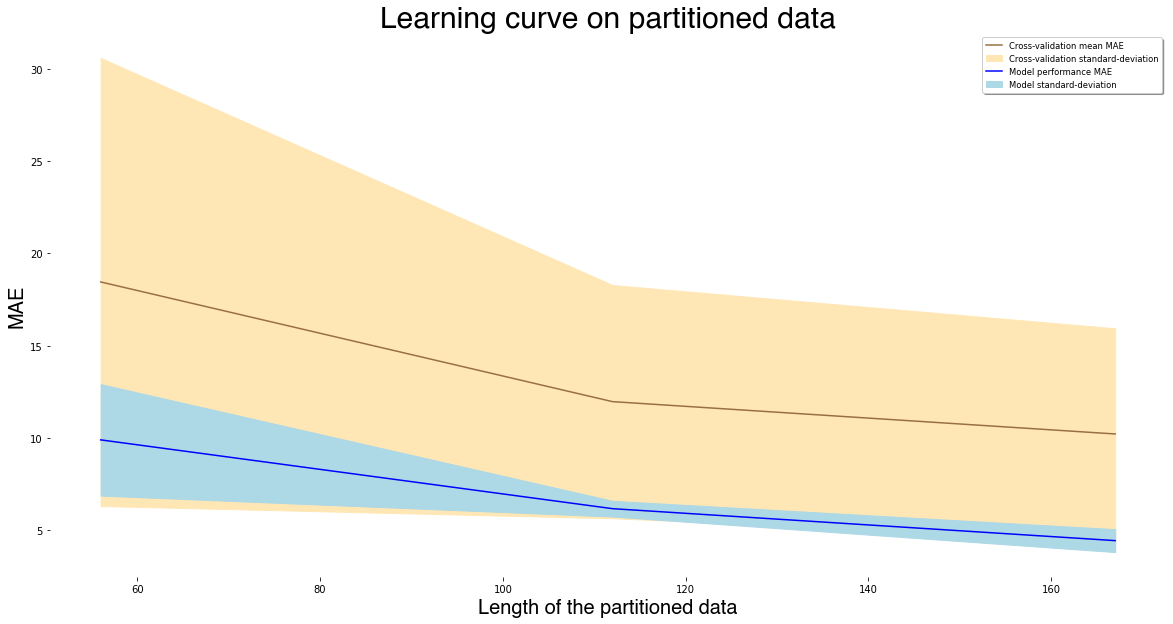

In [78]:
# CV
x = list(cross_validated_results.index)
y = list(cross_validated_results['mean'])
sd =  list(cross_validated_results_sd['mean'])

# model_performance
y1 = list(test_results['mean'])
sd1 = np.array(list(test_results['std']))



plot_ml_learning_curve(x, y1, y,sd1,  sd, save_pdf = True ,
                       path = 'ConStrain_on_google_colab/data/10-plots/07_1_LEARN_DataAnalysis/Learning_curve_on_partitioned_data_DBTL1_12_01_2023_10_height_10_length', 
                            size_height = 10,
                             size_length = 10)